# Ejercicio 5

En este ejercicio aplicaremos el corte de colas sobre una imagen en formato HSV, modificando la componente S o V de la imagen.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

CV = cv.imread('soluciones/Ej 1 - Color verdadero.png', cv.IMREAD_COLOR)

In [2]:
def corte(img, porc):
    
    resimg = img.copy()
    
    hist = {i:0 for i in range(0,256)}
    for linea in resimg:
        for pixel in linea:
            hist[pixel] = hist[pixel] + 1
    
    valores = list(hist.values())
    
    numPix = img.size
    perc = (numPix*porc)
    
    n = 0
    for i in range(1,256):
        n += valores[i]
        if n > perc:
            cmin = i
            break
            
    n = 0
    for i in range(255,0,-1):
        n += valores[i]
        if n > perc:
            cmax = i
            break
            
    for a in range(resimg.shape[0]):
        for b in range(resimg.shape[1]):
            if resimg[a][b] <= cmin:
                resimg[a][b] = 0
            elif resimg[a][b] >= cmax:
                resimg[a][b] = 255
            else:
                resimg[a][b] = 0 + ((resimg[a][b] - cmin) * (255 - 0))/(cmax - cmin)
    
    return resimg

In [3]:
def cortehsv(img):
    
    resimg = img.copy()
    
    hsv = cv.cvtColor(resimg, cv.COLOR_BGR2HSV)
    
    H,S,V = cv.split(hsv)
    
    SC = corte(S, 0.01)
    VC = corte(V, 0.01)
    
    resimgS = cv.merge((H,SC,V))
    resimgV = cv.merge((H,S,VC))
    resimgSV = cv.merge((H,SC,VC))
    
    resimgS = cv.cvtColor(resimgS, cv.COLOR_HSV2BGR)
    resimgV = cv.cvtColor(resimgV, cv.COLOR_HSV2BGR)
    resimgSV = cv.cvtColor(resimgSV, cv.COLOR_HSV2BGR)
    
    return resimgS, resimgV, resimgSV

In [4]:
corteS, corteV, corteSV = cortehsv(CV)

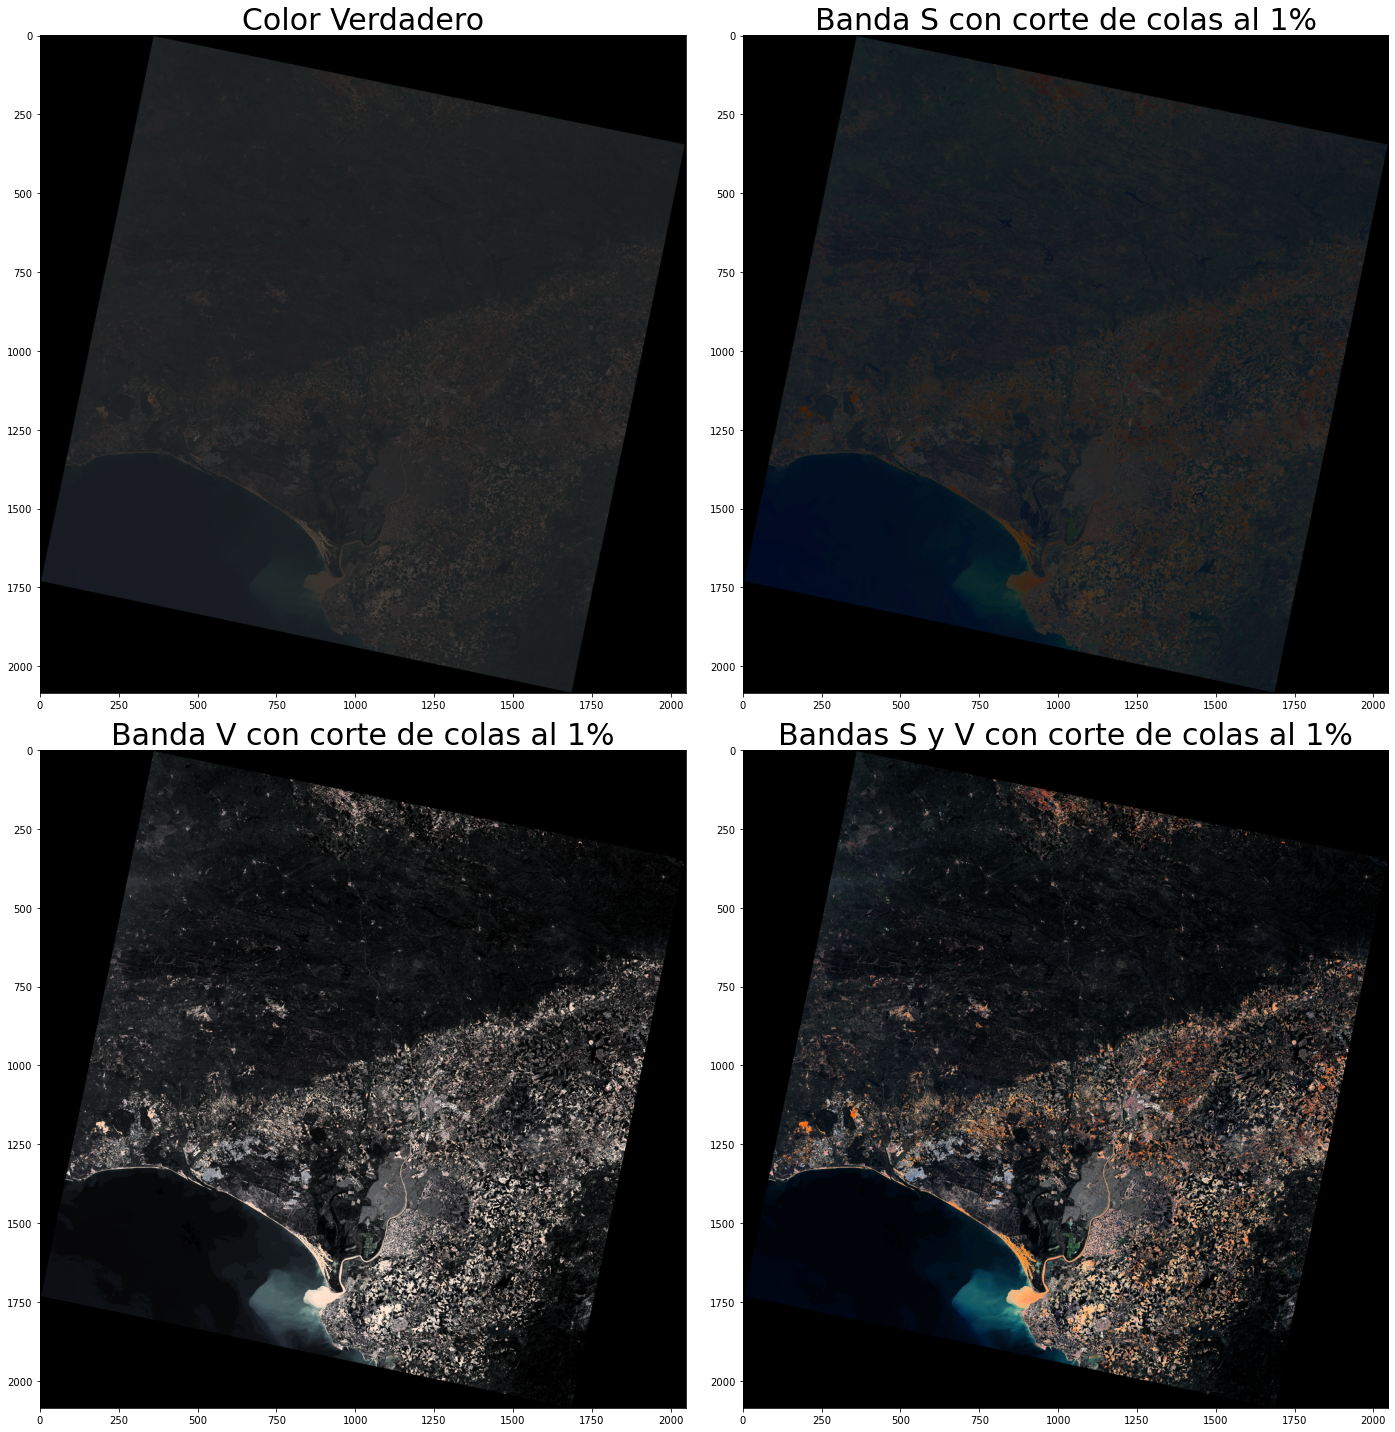

In [5]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(CV, cv.COLOR_BGR2RGB))
plt.title("Color Verdadero", fontsize = 30)

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(corteS, cv.COLOR_BGR2RGB))
plt.title("Banda S con corte de colas al 1%", fontsize = 30)

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(corteV, cv.COLOR_BGR2RGB))
plt.title("Banda V con corte de colas al 1%", fontsize = 30)

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(corteSV, cv.COLOR_BGR2RGB))
plt.title("Bandas S y V con corte de colas al 1%", fontsize = 30)

plt.tight_layout()
plt.show()

In [6]:
cv.imwrite("soluciones/Ej 5 - Banda S corte de colas 1%.png", corteS)
cv.imwrite("soluciones/Ej 5 - Banda V corte de colas 1%.png", corteV)
cv.imwrite("soluciones/Ej 5 - Bandas S y V corte de colas 1%.png", corteSV)

True